<a href="https://colab.research.google.com/github/JSEFERINO/Estadistica_Moderna/blob/main/97_C_DOE_Anidado_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías Básicas para Diseño de Experimentos**

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statsmodels
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import scipy.stats as stats
!pip install bioinfokit &>/dev/null # para evitar que se vea lo que se corre
from bioinfokit.analys import stat
!pip install pingouin &>/dev/null # para evitar que se vea lo que se corre
import pingouin as pg

#  **Tema 8: Diseños Anidados y Parcelas Divididas - usando Python**

## **Objetivos de aprendizaje**

### **$\bullet$** Distinguir entre factores anidados y cruzados e identificar situaciones donde el diseño anidado es la opción experimental adecuada.
### **$\bullet$** Realizar el análisis de diseños anidados que involucran o no factores cruzados.
### **$\bullet$** Identificar diferentes situaciones prácticas que pueden llevar a utilizar un experimento en parcelas divididas.
### **$\bullet$** Distinguir diferentes estructuras de diseño que pueden presentar los factores en las parcelas y las subparcelas.
### **$\bullet$**Comprender por qué algunos experimentos con arreglo interno y externo son en realidad parcelas divididas.
### **$\bullet$**Analizar e interpretar correctamente el diseño en parcelas divididas. Entender de qué manera un análisis incorrecto podría cambiar las conclusiones.


# **El Problema**
### **Un caso típico de anidamiento surge cuando se quiere evaluar el error de un sistema de medición mediante un estudio de repetibilidad y reproducibilidad (R&R), ver Gutiérrez y De la Vara (2004), donde la medición de cada pieza se obtiene por medio de una prueba destructiva. Los estudios R&R requieren que una misma pieza sea medida por lo menos dos veces por los operadores participantes en el estudio, pero esto no es posible en pruebas destructivas. Si suponemos que cada pieza o parte se puede dividir en tres pedazos que se destruyen al medirlos, entonces estos tres pedazos sólo permiten que un operador haga sus repeticiones sobre la misma pieza; por ello, los otros operadores tendrán que utilizar piezas diferentes. En este sentido se dice que las piezas están anidadas en los operadores, como se muestra en la figura siguiente, donde a fin de ilustrar el diseño anidado se consideran: dos operadores, cuatro piezas y tres repeticiones. Advierta que en la figura se enfatiza que cada operador utiliza piezas diferentes empleando la numeración de las piezas del 1 al 8. Si cada pieza no se pudiera dividir en tres pedazos y/o la pieza sólo resistiera una medición, todavía se podría correr este diseño, pero suponiendo que es posible construir pequeños lotes de tres piezas similares, donde cada operador haría sus tres repeticiones. En este experimento es razonable suponer que el factor operador es fijo porque los dos trabajadores están disponibles y el factor pieza es aleatorio, ya que éstas son una selección aleatoria de la producción**

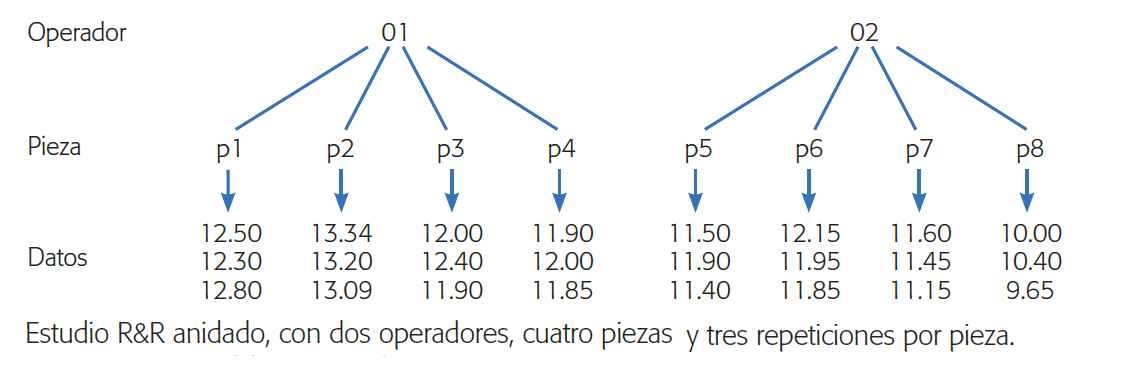

# **Paso 1. Construyendo el DataFrame para los datos**

# **a. Usamos Chat GPT para construir el DataFrame de los datos**

In [24]:
# **a. Usamos Chat GPT para construir el DataFrame de los datos**
# Definir los datos en forma de lista de listas
data = [
    ["O1", "P1", 12.50],
    ["O1", "P1", 12.30],
    ["O1", "P1", 12.80],
    ["O1", "P2", 13.34],
    ["O1", "P2", 13.20],
    ["O1", "P2", 13.09],
    ["O1", "P3", 12.00],
    ["O1", "P3", 12.40],
    ["O1", "P3", 11.90],
    ["O1", "P4", 11.90],
    ["O1", "P4", 12.00],
    ["O1", "P4", 11.85],
    ["O2", "P5", 11.50],
    ["O2", "P5", 11.90],
    ["O2", "P5", 11.40],
    ["O2", "P6", 12.15],
    ["O2", "P6", 11.95],
    ["O2", "P6", 11.85],
    ["O2", "P7", 11.60],
    ["O2", "P7", 11.45],
    ["O2", "P7", 11.15],
    ["O2", "P8", 10.00],
    ["O2", "P8", 10.40],
    ["O2", "P8", 9.65]
]

# Definir el nombre de las columnas
columnas = ["OPERADOR", "PIEZA", "RESISTENCIA"]

# Crear el DataFrame
df = pd.DataFrame(data, columns=columnas)

# Imprimir el DataFrame
print(df)


   OPERADOR PIEZA  RESISTENCIA
0        O1    P1        12.50
1        O1    P1        12.30
2        O1    P1        12.80
3        O1    P2        13.34
4        O1    P2        13.20
5        O1    P2        13.09
6        O1    P3        12.00
7        O1    P3        12.40
8        O1    P3        11.90
9        O1    P4        11.90
10       O1    P4        12.00
11       O1    P4        11.85
12       O2    P5        11.50
13       O2    P5        11.90
14       O2    P5        11.40
15       O2    P6        12.15
16       O2    P6        11.95
17       O2    P6        11.85
18       O2    P7        11.60
19       O2    P7        11.45
20       O2    P7        11.15
21       O2    P8        10.00
22       O2    P8        10.40
23       O2    P8         9.65


## **b. Para la configuración data construimos el Anova**
### **$\bullet$** El Factor anidado debe tener $a(b-1)=2*(4-1)=6$ grados de libertad y el el valor F para el anidado no es el correcto


### $\bullet$  **Tabla Anova**
### $\bullet$  **b = # numero de observadores diferentes en cada nivel del Factor A**



|Fuente|df|sum_sq |mean_sq|F|PR(>F)|
|:---:|:---:|:---:|:---:|:---:|:---:|
|A |a-1| $SSA$ |$MSA$ |MSA/MSA(B)|
|A:B  |a(b-1)|SSA(B)| MSA(B)|
|Residual | ab(n-1) |MSE|          
|Total|abn-1

In [25]:
model = smf.ols("RESISTENCIA ~OPERADOR + OPERADOR/PIEZA",data=df).fit()
anova_df = sm.stats.anova_lm(model)
print(anova_df)

                  df    sum_sq   mean_sq           F        PR(>F)
OPERADOR         1.0  8.496600  8.496600  153.947154  1.266316e-09
OPERADOR:PIEZA  14.0  9.971013  0.712215   12.904398  3.678377e-06
Residual        16.0  0.883067  0.055192         NaN           NaN


## **c. El Anova real para el diseño es el siguiente**

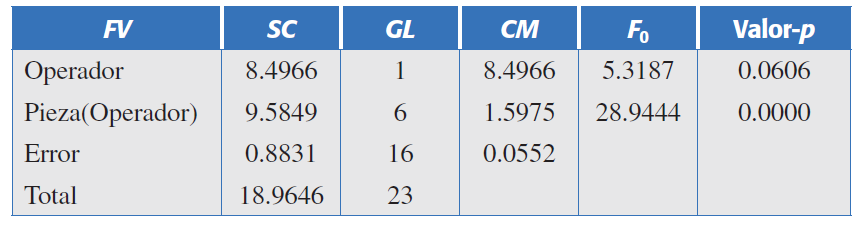

# **c. Un primer intento para hacer el Diseño Anidado - Organizamos los datos para ser tratados como un diseño anidado**


In [26]:
import pandas as pd
import statsmodels.formula.api as smf

nobs = 3 # Número de observaciones en cada combinacion de niveles de ambos factores
nO = 2 # Número de Operadores
nP = 4 # Número de Piezas diferentes en cada nivel del Factor Operador
O = [f"O{i}" for i in range(1,nO+1) for h in range(nobs*nP)]
P = [f"P{i}{j}" for i in range(1,nO+1) for j in range(1,nP+1) for h in range(nobs)]
obs = list(range(3))*nO*nP

data = (12.50,	12.30,	12.80,	13.34,	13.20,	13.09,	12.00,	12.40,	11.90,	11.90,	12.00,	11.85,
        11.50,	11.90,	11.40,	12.15,	11.95,	11.85,	11.60,	11.45,	11.15,	10.00,	10.40,	9.65)

df2 = pd.DataFrame(data ={
    "O": O,
    "P": P,
    "Observation_number": obs,
},dtype="category")
df2 = df2.join(pd.Series(data=data,name="y"))
print(df2)

     O    P Observation_number      y
0   O1  P11                  0  12.50
1   O1  P11                  1  12.30
2   O1  P11                  2  12.80
3   O1  P12                  0  13.34
4   O1  P12                  1  13.20
5   O1  P12                  2  13.09
6   O1  P13                  0  12.00
7   O1  P13                  1  12.40
8   O1  P13                  2  11.90
9   O1  P14                  0  11.90
10  O1  P14                  1  12.00
11  O1  P14                  2  11.85
12  O2  P21                  0  11.50
13  O2  P21                  1  11.90
14  O2  P21                  2  11.40
15  O2  P22                  0  12.15
16  O2  P22                  1  11.95
17  O2  P22                  2  11.85
18  O2  P23                  0  11.60
19  O2  P23                  1  11.45
20  O2  P23                  2  11.15
21  O2  P24                  0  10.00
22  O2  P24                  1  10.40
23  O2  P24                  2   9.65


In [27]:
model = smf.ols("y ~ O + O/P",data=df2).fit()
anova_df2 = sm.stats.anova_lm(model)
print(anova_df2)

            df    sum_sq   mean_sq           F        PR(>F)
O          1.0  8.496600  8.496600  153.947154  1.266316e-09
O:P       14.0  9.971013  0.712215   12.904398  3.678377e-06
Residual  16.0  0.883067  0.055192         NaN           NaN


### $\bullet$  **Con la configuración siguiente sigue persistiendo el mismo error**

# **d. Corrigiendo el Error**

In [28]:
import pandas as pd
import statsmodels.formula.api as smf

nobs = 3 # Número de observaciones en cada combinacion de niveles de ambos factores
nO = 2 # Número de Operadores
nP = 4 # Número de Piezas diferentes en cada nivel del Factor Operador
O = [f"O{i}" for i in range(1,nO+1) for h in range(nobs*nP)]
P = [f"P{j}" for i in range(1,nO+1) for j in range(1,nP+1) for h in range(nobs)]
obs = list(range(3))*nO*nP

data = (12.50,	12.30,	12.80,	13.34,	13.20,	13.09,	12.00,	12.40,	11.90,	11.90,	12.00,	11.85,
        11.50,	11.90,	11.40,	12.15,	11.95,	11.85,	11.60,	11.45,	11.15,	10.00,	10.40,	9.65)

df3 = pd.DataFrame(data ={
    "O": O,
    "P": P,
    "Observation_number": obs,
},dtype="category")
df3 = df3.join(pd.Series(data=data,name="y"))
print(df3)

     O   P Observation_number      y
0   O1  P1                  0  12.50
1   O1  P1                  1  12.30
2   O1  P1                  2  12.80
3   O1  P2                  0  13.34
4   O1  P2                  1  13.20
5   O1  P2                  2  13.09
6   O1  P3                  0  12.00
7   O1  P3                  1  12.40
8   O1  P3                  2  11.90
9   O1  P4                  0  11.90
10  O1  P4                  1  12.00
11  O1  P4                  2  11.85
12  O2  P1                  0  11.50
13  O2  P1                  1  11.90
14  O2  P1                  2  11.40
15  O2  P2                  0  12.15
16  O2  P2                  1  11.95
17  O2  P2                  2  11.85
18  O2  P3                  0  11.60
19  O2  P3                  1  11.45
20  O2  P3                  2  11.15
21  O2  P4                  0  10.00
22  O2  P4                  1  10.40
23  O2  P4                  2   9.65


In [29]:
model = ols("y ~ O+O/P",data=df3).fit()
anova_df3 = sm.stats.anova_lm(model)
print(anova_df3)

            df    sum_sq   mean_sq           F        PR(>F)
O          1.0  8.496600  8.496600  153.947154  1.266316e-09
O:P        6.0  9.584933  1.597489   28.944386  9.876055e-08
Residual  16.0  0.883067  0.055192         NaN           NaN


### $\bullet$  **Con la configuración siguiente mejora el Anova donde los operadores se consideran como fijos, sinembargo, los operadores son aleatorios por lo cual realizaremos el anova bajo este supuesto arriba**

# **Resultado del Anova con Efectos aleatorios**

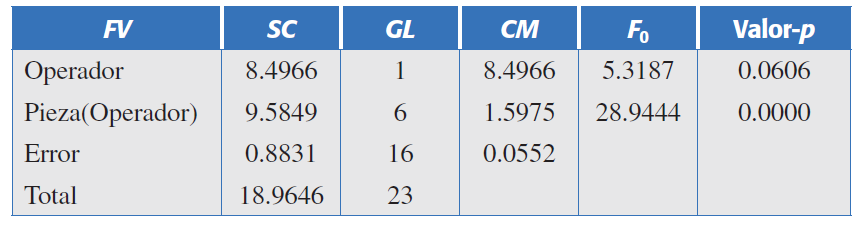

# **Paso2. El Diseño Factor Anidado simple**
## **a. Estadisticos del Anova Anidada**

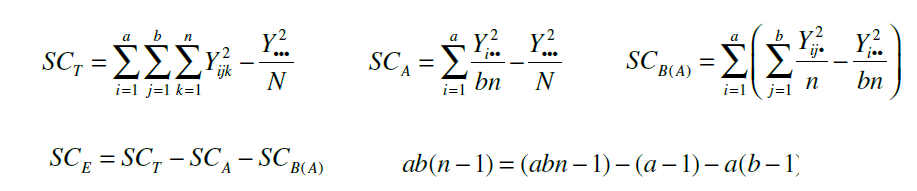

## **b. Suma de los cuadrados total**

In [43]:
## **b. Suma de los cuadrados total**
# Agregamos al DataFrame una nueva columna, la de cuadrados
df = df3
a = 2
b = 4
n = 3
N = a*b*n
df['y^2'] = df['y'] ** 2
print(df)


     O   P Observation_number      y       y^2
0   O1  P1                  0  12.50  156.2500
1   O1  P1                  1  12.30  151.2900
2   O1  P1                  2  12.80  163.8400
3   O1  P2                  0  13.34  177.9556
4   O1  P2                  1  13.20  174.2400
5   O1  P2                  2  13.09  171.3481
6   O1  P3                  0  12.00  144.0000
7   O1  P3                  1  12.40  153.7600
8   O1  P3                  2  11.90  141.6100
9   O1  P4                  0  11.90  141.6100
10  O1  P4                  1  12.00  144.0000
11  O1  P4                  2  11.85  140.4225
12  O2  P1                  0  11.50  132.2500
13  O2  P1                  1  11.90  141.6100
14  O2  P1                  2  11.40  129.9600
15  O2  P2                  0  12.15  147.6225
16  O2  P2                  1  11.95  142.8025
17  O2  P2                  2  11.85  140.4225
18  O2  P3                  0  11.60  134.5600
19  O2  P3                  1  11.45  131.1025
20  O2  P3   

## **c. Suma de cuadrados total**

In [51]:
## **c. Suma de cuadrados total**
Sum_T = df['y'].sum() # Sumamos todas las observaciones 'y'
Sum2_T = df['y^2'].sum() # Sumamos todas las observaciones 'y^2'
SCT = Sum2_T-Sum_T**2/N
CMT = SCT/(N-1)
print(f'La variabilidad total es SCT = {SCT}')
print(f'La varianza total es CMT = {CMT}')

La variabilidad total es SCT = 18.964600000001155
La varianza total es CMT = 0.8245478260870067


## **d. Suma de cuadrados del Factor Operador**

In [52]:
## **d. Suma de cuadrados del Factor Operador**
Sum_O1, Sum_O2 = df.groupby('O')['y'].sum() # Sumamos todas las observaciones por nivel del Operador 'O'
Sum2_O = Sum_O1**2 + Sum_O2**2  # Sumamos los cuadrados de las observaciones del operador
SCO = Sum2_O/(b*n)-Sum_T**2/N
CMO = SCO/(a-1)
print(f'La variabilidad total es SCO = {SCO}')
print(f'La varianza de los operadores  es CMO = {CMO}')

La variabilidad total es SCO = 8.496600000000853
La varianza de los operadores  es CMO = 8.496600000000853


## **e. Suma de cuadrados del Factor anidado Pieza(Operador)**

In [53]:
## **e. Suma de cuadrados del Factor anidado Pieza(Operador)**
suma_por_combinacion = df.groupby(['O', 'P'])['y'].sum() # Hallamos la suma por combinación 'OP'
print(f'Imprime la suma por combinación {suma_por_combinacion}')
a_2 = suma_por_combinacion*suma_por_combinacion # Cada combinacion se eleva alcuadrado
print(f'la suma por combinacion al cuadrado es {a_2}')
Sum2_comb = a_2.sum()
print(f'la suma total por combinacion al cuadrado es {Sum2_comb}')
SC_anid = Sum2_comb/n - Sum2_O/(b*n)
CM_anid = SC_anid/(a*(b-1))
print(f'la variabilidad anidada es SC_anid = {SC_anid}')
print(f'la varianza anidada es CM_anid = {CM_anid}')


Imprime la suma por combinación O   P 
O1  P1    37.60
    P2    39.63
    P3    36.30
    P4    35.75
O2  P1    34.80
    P2    35.95
    P3    34.20
    P4    30.05
Name: y, dtype: float64
la suma por combinacion al cuadrado es O   P 
O1  P1    1413.7600
    P2    1570.5369
    P3    1317.6900
    P4    1278.0625
O2  P1    1211.0400
    P2    1292.4025
    P3    1169.6400
    P4     903.0025
Name: y, dtype: float64
la suma total por combinacion al cuadrado es 10156.134399999999
la variabilidad anidada es SC_anid = 9.584933333333083
la varianza anidada es CM_anid = 1.5974888888888472


## **f. Variabilidad de error**

In [54]:
## **f. Variabilidad de error**
SCE = SCT - SCO - SC_anid
MSE = SCE/(a*b*(n-1))
print(f'la variabilidad del error es SCE = {SCE}')
print(f'la varianza del error es MSE = {MSE}')


la variabilidad del error es SCE = 0.8830666666672187
la varianza del error es MSE = 0.05519166666670117


## **g. Nuevas librerias**

In [55]:
!pip install texttable &>/dev/null # para evitar que se vea lo que se corre
from texttable import Texttable

## **h. El Valor p para cada prueba del Anova**

In [57]:
## **h. El Valor p para cada prueba del Anova**
from scipy import stats
F1 = stats.f(a-1,a*(b-1))
F2 = stats.f(a*(b-1),a*b*(n-1))

valor_p1 = 1 - F1.cdf(CMO/CM_anid)
valor_p2 = 1 - F2.cdf(CM_anid/MSE)


## **i. La Tabla Anova con el operador como efectos aleatorio**

In [58]:
## **i. La Tabla Anova es**
t2 = Texttable()
t2.add_rows([['Fuente','SS', 'g.l', 'MS', 'F', 'valor_p'],
           ['OPERADOR',	SCO,	a-1,	CMO,	CMO/CM_anid, valor_p1],
           ['PIEZA(OPERADOR)',	SC_anid,	a*(b-1),	CM_anid,	CM_anid/MSE, valor_p2],
           ['Error',	SCE,	a*b*(n-1),	MSE, '', ''],
           ['Total',	SCT,	N-1, '' , '', '']])
print(t2.draw())

+-----------------+--------+-----+-------+--------+---------+
|     Fuente      |   SS   | g.l |  MS   |   F    | valor_p |
+=================+========+=====+=======+========+=========+
| OPERADOR        | 8.497  | 1   | 8.497 | 5.319  | 0.061   |
+-----------------+--------+-----+-------+--------+---------+
| PIEZA(OPERADOR) | 9.585  | 6   | 1.597 | 28.944 | 0.000   |
+-----------------+--------+-----+-------+--------+---------+
| Error           | 0.883  | 16  | 0.055 |        |         |
+-----------------+--------+-----+-------+--------+---------+
| Total           | 18.965 | 23  |       |        |         |
+-----------------+--------+-----+-------+--------+---------+


# **Paso3. Para ayudarnos a calcular sumas en un dataFrame con CHATGPT**

In [59]:
import pandas as pd

# Crear un DataFrame con las combinaciones de A y B y tres observaciones aleatorias
data = {
    'A': ['A1', 'A1', 'A1', 'A2', 'A2', 'A2'],
    'B': ['B1', 'B2', 'B3', 'B1', 'B2', 'B3'],
    'Observacion': [10, 15, 20, 25, 30, 35]
}

df = pd.DataFrame(data)

# Calcular la suma de observaciones por nivel de A
suma_por_A = df.groupby('A')['Observacion'].sum()

# Calcular la suma de observaciones por nivel de B
suma_por_B = df.groupby('B')['Observacion'].sum()

# Calcular la suma de observaciones por combinación de A y B
suma_por_combinacion = df.groupby(['A', 'B'])['Observacion'].sum()

# Calcular el cuadrado de cada observación
df['Observacion_Cuadrado'] = df['Observacion'] ** 2

# Calcular la suma de los cuadrados de observaciones por nivel de A
suma_cuadrados_por_A = df.groupby('A')['Observacion_Cuadrado'].sum()

# Calcular la suma de los cuadrados de observaciones por nivel de B
suma_cuadrados_por_B = df.groupby('B')['Observacion_Cuadrado'].sum()

# Calcular la suma de los cuadrados de observaciones por combinación de A y B
suma_cuadrados_por_combinacion = df.groupby(['A', 'B'])['Observacion_Cuadrado'].sum()

# Imprimir los resultados
print("Suma de observaciones por nivel de A:\n", suma_por_A)
print("\nSuma de observaciones por nivel de B:\n", suma_por_B)
print("\nSuma de observaciones por combinación de A y B:\n", suma_por_combinacion)
print("\nSuma de cuadrados de observaciones por nivel de A:\n", suma_cuadrados_por_A)
print("\nSuma de cuadrados de observaciones por nivel de B:\n", suma_cuadrados_por_B)
print("\nSuma de cuadrados de observaciones por combinación de A y B:\n", suma_cuadrados_por_combinacion)


Suma de observaciones por nivel de A:
 A
A1    45
A2    90
Name: Observacion, dtype: int64

Suma de observaciones por nivel de B:
 B
B1    35
B2    45
B3    55
Name: Observacion, dtype: int64

Suma de observaciones por combinación de A y B:
 A   B 
A1  B1    10
    B2    15
    B3    20
A2  B1    25
    B2    30
    B3    35
Name: Observacion, dtype: int64

Suma de cuadrados de observaciones por nivel de A:
 A
A1     725
A2    2750
Name: Observacion_Cuadrado, dtype: int64

Suma de cuadrados de observaciones por nivel de B:
 B
B1     725
B2    1125
B3    1625
Name: Observacion_Cuadrado, dtype: int64

Suma de cuadrados de observaciones por combinación de A y B:
 A   B 
A1  B1     100
    B2     225
    B3     400
A2  B1     625
    B2     900
    B3    1225
Name: Observacion_Cuadrado, dtype: int64
